In [11]:
#데이터 준비하기 
import pandas as pd

train_data = pd.read_csv("E:\데이콘\\전복나이 예측\\데이터\\train.csv")

ques_data = pd.read_csv("E:\데이콘\\전복나이 예측\\데이터\\test.csv")

In [12]:
print(train_data.shape)
train_data.drop(index=762,axis =0,inplace= True)
train_data.drop(index=465,axis =0,inplace= True)
train_data.drop(index=47,axis =0,inplace= True)
train_data.drop(index=382,axis =0,inplace= True)
train_data.drop(index=435,axis =0,inplace= True)
train_data.drop(index=1078,axis =0,inplace= True)

(1253, 10)


In [13]:
#water = 전체무게 -(껍질무게+껍질을 제외한 무게) 보다 ratio=껍질을 제외한 무게/전체 무게 
water_train = train_data['Whole Weight'] -train_data['Shucked Weight']
water_ques = ques_data['Whole Weight'] -ques_data['Shucked Weight']

In [14]:
train_data['Water'] = water_train
ques_data['Water'] = water_ques

In [15]:
Ratio_train =  train_data['Shucked Weight']/train_data['Whole Weight'] 
Ratio_ques =  ques_data['Shucked Weight']/ques_data['Whole Weight'] 
train_data['Ratio'] = Ratio_train
ques_data['Ratio'] = Ratio_ques
print(train_data.head())
ques_data.head()

   id Gender  Lenght  Diameter  Height  Whole Weight  Shucked Weight  \
0   1      M   0.605     0.470   0.115        1.1140          0.3925   
1   2      I   0.430     0.315   0.095        0.3780          0.1750   
2   3      I   0.580     0.490   0.195        1.3165          0.5305   
3   4      M   0.535     0.405   0.175        1.2705          0.5480   
4   5      I   0.310     0.235   0.090        0.1270          0.0480   

   Viscra Weight  Shell Weight  Target   Water     Ratio  
0         0.2910        0.3100      15  0.7215  0.352334  
1         0.0800        0.1045       8  0.2030  0.462963  
2         0.2540        0.4100      18  0.7860  0.402962  
3         0.3265        0.3370      13  0.7225  0.431326  
4         0.0310        0.0400       6  0.0790  0.377953  


,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Water,Ratio
0,1,F,0.595,0.470,0.155,1.121,0.4515,0.1780,0.1550,0.6695,0.402765
1,2,M,0.580,0.450,0.150,0.927,0.2760,0.1815,0.3600,0.6510,0.297735
2,3,I,0.260,0.205,0.070,0.097,0.0415,0.0190,0.0305,0.0555,0.427835
3,4,M,0.590,0.460,0.130,1.102,0.4550,0.2055,0.3300,0.6470,0.412886
4,5,F,0.595,0.465,0.140,1.113,0.5175,0.2440,0.3050,0.5955,0.464960


In [16]:
ques_input = ques_data.drop(['id'], axis=1)
train_max_input = train_data.drop(['id', 'Target'], axis=1)
train_max_target = train_data['Target']

In [17]:
print(type(train_max_input))
print(type(train_max_target))
print(type(ques_input))
print(train_max_input.to_numpy())
print(train_max_input.columns)
print(train_max_input['Gender']=='M')

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
[['M' 0.605 0.47 ... 0.31 0.7215 0.3523339317773788]
 ['I' 0.43 0.315 ... 0.1045 0.203 0.4629629629629629]
 ['I' 0.58 0.49 ... 0.41 0.786 0.4029624003038359]
 ...
 ['F' 0.525 0.41 ... 0.18 0.3585 0.5371207230471272]
 ['F' 0.445 0.335 ... 0.1195 0.23299999999999998 0.46498277841561425]
 ['F' 0.75 0.55 ... 0.44 1.0025 0.45293315143246926]]
Index(['Gender', 'Lenght', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight', 'Water', 'Ratio'],
      dtype='object')
0        True
1       False
2       False
3        True
4       False
        ...  
1248    False
1249    False
1250    False
1251    False
1252    False
Name: Gender, Length: 1247, dtype: bool


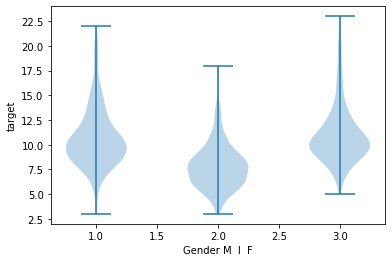

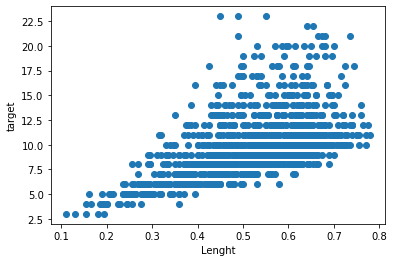

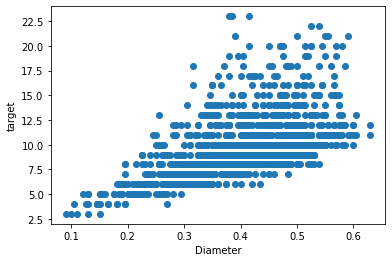

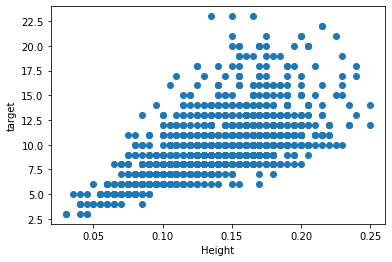

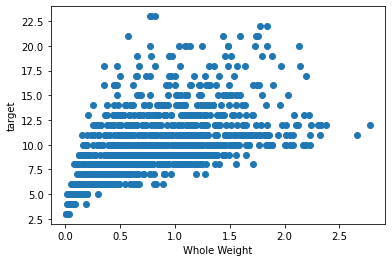

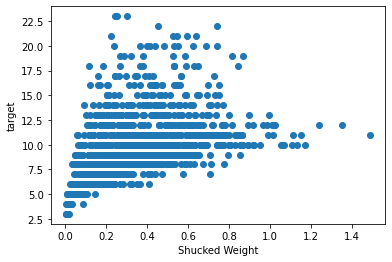

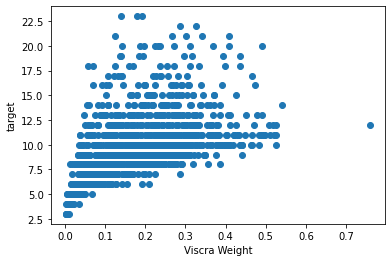

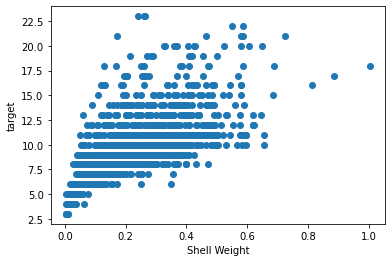

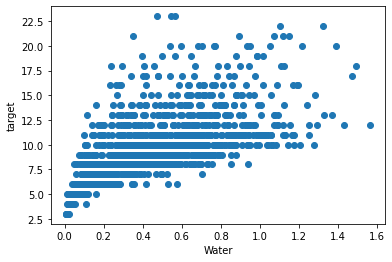

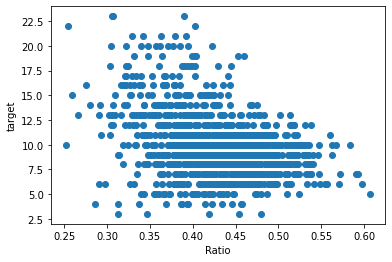

In [18]:
import matplotlib.pyplot as plt
i=1
for column in train_max_input.columns:
    if column == 'Gender':
        plt.violinplot([train_max_target[train_max_input[column]=='M'],train_max_target[train_max_input[column]=='I'],train_max_target[train_max_input[column]=='F']])
        plt.xlabel("Gender M  I  F")
        plt.ylabel('target')
        plt.show()
    else:
        plt.scatter(train_max_input[column],train_max_target)
        plt.xlabel(column)
        plt.ylabel('target')
        plt.show()

30에 가까운 값 제거 하고 15살 이상 오버 샘플링 필요 한거 같음.

823
349
75


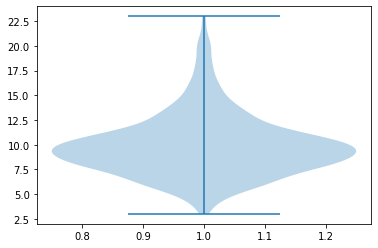

In [19]:
import numpy as np
print(np.sum(train_max_target<=10))
print(np.sum(train_max_target<=15) -np.sum(train_max_target<=10) )
print(np.sum(15<train_max_target))
plt.violinplot(train_max_target)
plt.show()


In [20]:

print(train_max_input.shape)
#train_max_input.drop(index = [train_max_target>25], axis = 0)
train_max_input[train_max_target>25]
print(train_max_input.shape)
print(train_max_target.shape)


(1247, 10)
(1247, 10)
(1247,)


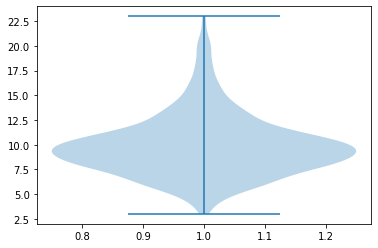

In [21]:
plt.violinplot(train_max_target)
plt.show()


In [22]:
print(np.sum(train_max_target<=5))
print(np.sum(train_max_target<=13) -np.sum(train_max_target<=5) )
print(np.sum(13<train_max_target))

55
1049
143


5보다 작은거랑 13보다 큰거 오버 샘플링 하겠음

In [23]:
T_range = []
for i in train_max_target:
    if i<=5 :
        T_range.append(1)
    elif i <=9:
        T_range.append(2)
    elif i<=13:
        T_range.append(3)
    else:
        T_range.append(4)


In [24]:
T_range =np.array(T_range)
print(T_range)

[4 2 4 ... 2 2 3]


[55, 566, 483, 143]


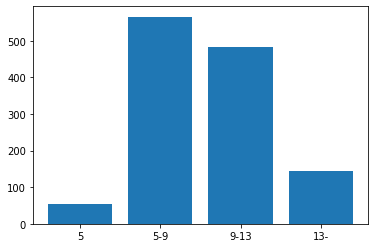

In [25]:

T_range_x = ['5','5-9','9-13','13-']
T_range_y =[np.sum(T_range==1),np.sum(T_range==2),np.sum(T_range==3),np.sum(T_range==4)]
print(T_range_y)
plt.bar(T_range_x,T_range_y)
plt.show()

In [26]:
print(type(train_max_target))

<class 'pandas.core.series.Series'>


In [27]:
train_T1 =train_max_input[T_range==1]
train_T4 = train_max_input[T_range==4]
train_target_T1 =train_max_target[T_range==1]
train_target_T4 =train_max_target[T_range==4]
for i in range(0,7):
    train_max_input = pd.concat([train_max_input,train_T1],axis=0)
    train_max_target =pd.concat([train_max_target,train_target_T1])
for i in range(0,2):
    train_max_input =pd.concat([train_max_input,train_T4],axis=0)
    train_max_target =pd.concat([train_max_target,train_target_T4])
print(train_max_input.shape)
print(train_max_input)
    
    

(1918, 10)
     Gender  Lenght  Diameter  Height  Whole Weight  Shucked Weight  \
0         M   0.605     0.470   0.115        1.1140          0.3925   
1         I   0.430     0.315   0.095        0.3780          0.1750   
2         I   0.580     0.490   0.195        1.3165          0.5305   
3         M   0.535     0.405   0.175        1.2705          0.5480   
4         I   0.310     0.235   0.090        0.1270          0.0480   
...     ...     ...       ...     ...           ...             ...   
1224      M   0.585     0.465   0.190        1.1710          0.3905   
1233      M   0.570     0.450   0.155        0.9100          0.3260   
1234      F   0.490     0.385   0.150        0.7865          0.2410   
1237      F   0.515     0.425   0.140        0.7660          0.3040   
1246      M   0.500     0.385   0.145        0.7615          0.2460   

      Viscra Weight  Shell Weight   Water     Ratio  
0            0.2910        0.3100  0.7215  0.352334  
1            0.0800        0

[440, 566, 483, 429]


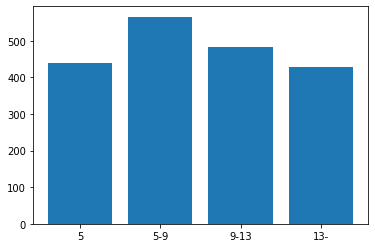

In [28]:
T_range = []
for i in train_max_target:
    if i<=5 :
        T_range.append(1)
    elif i <=9:
        T_range.append(2)
    elif i<=13:
        T_range.append(3)
    else:
        T_range.append(4)

T_range =np.array(T_range)
T_range_x = ['5','5-9','9-13','13-']
T_range_y =[np.sum(T_range==1),np.sum(T_range==2),np.sum(T_range==3),np.sum(T_range==4)]
print(T_range_y)
plt.bar(T_range_x,T_range_y)
plt.show()

In [29]:
# 원핫 인코딩 후 넘파이 배열로 전환
train_max_input = pd.get_dummies(train_max_input)
ques_input =pd.get_dummies(ques_input)
train_max_input=train_max_input.to_numpy()
train_max_target=train_max_target.to_numpy()
ques_input =ques_input.to_numpy()

In [30]:
#import하기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge

In [31]:
#훈련세트와 테스트 세트 나누기
train_input, test_input, train_target, test_target = train_test_split(train_max_input,train_max_target, test_size=0.2, random_state=30)

In [32]:
#훈련세트랑 검증세트도
sub_input, val_input,sub_target, val_target = train_test_split(train_input,train_target, test_size=0.2,random_state=42)

In [33]:
#특성공학으로 특성 늘리기
poly = PolynomialFeatures(degree=2,include_bias= False)
poly.fit(sub_input)
train_poly=poly.transform(train_input)
test_poly = poly.transform(test_input)
sub_poly=poly.transform(sub_input)
val_poly = poly.transform(val_input)
train_max_poly = poly.transform(train_max_input)
ques_poly = poly.transform(ques_input)

In [34]:
#규제 전 전처리 과정
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
ss.fit(sub_poly)
train_scaled = ss.transform(train_poly)
sub_scaled = ss.transform(sub_poly)
val_scaled = ss.transform(val_poly)
train_max_scaled = ss.transform(train_max_poly)
ques_scaled = ss.transform(ques_poly)
test_scaled = ss.transform(test_poly)

In [35]:
#릿지 규제
ridge = Ridge()
ridge.fit(sub_scaled, sub_target)
print(ridge.score(sub_scaled,sub_target))
print(ridge.score(val_scaled,val_target))

0.759343917649373
0.7620907971512927


In [36]:
sub_scores =[]
val_scores = []

In [37]:
#최적의 alpha값 찾기
alpha_list = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for alpha in alpha_list:
    ridge= Ridge(alpha=alpha)
    ridge.fit(sub_scaled, sub_target)
    sub_scores.append(ridge.score(sub_scaled,sub_target))
    val_scores.append(ridge.score(val_scaled,val_target))
    
print(sub_scores)
print(val_scores)
print(np.max(val_scores))
print(np.argmax(val_scores))
alpha_list[np.argmax(val_scores)]

[0.7688229164808378, 0.7688101467423359, 0.7685134449093608, 0.7663574146168963, 0.759343917649373, 0.7461722847969283, 0.7116893202046937, 0.6703143460130969, 0.5391802987993866]
[0.7639825427570943, 0.7645062541084203, 0.7663428934781458, 0.7665343450884421, 0.7620907971512927, 0.7560847770042761, 0.7261211143731585, 0.6841329167781584, 0.5448911328750803]
0.7665343450884421
3


0.1

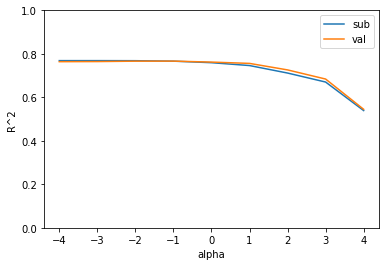

In [38]:
plt.plot(np.log10(alpha_list),sub_scores)
plt.plot(np.log10(alpha_list),val_scores)
plt.ylim(0, 1)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(['sub','val'])
plt.show()

In [39]:
#최종 확인
ridge =Ridge(alpha=1)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.7617602954369879
0.692780679443562
